In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
uploaded = files.upload()

dataset = pd.read_csv('train (2).csv')


Saving train.csv to train.csv


FileNotFoundError: [Errno 2] No such file or directory: 'train (2).csv'

In [ ]:
dataset.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [ ]:
X = dataset.drop('type', axis=1)
Y = dataset['type']

In [ ]:
Y.head()

0    24500
1    25500
2    11700
3    12000
4    26000
Name: price, dtype: int64

In [ ]:
df = pd.DataFrame(X)
categorical_columns = ['model', 'year', 'motor_type', 'running', 'wheel', 'color', 'price', 'status', 'motor_volume' ]
label_encoders = {}
for col in categorical_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

X = df.to_numpy()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def cluster_entropy(cluster_labels, true_labels):
    unique_clusters = np.unique(cluster_labels)
    unique_classes = np.unique(true_labels)

    entropy = 0
    for cluster in unique_clusters:
        # Data points in the current cluster
        cluster_data = true_labels[cluster_labels == cluster]
        cluster_size = len(cluster_data)
        cluster_entropy = 0

        for cls in unique_classes:
            cls_count = np.sum(cluster_data == cls)
            if cls_count > 0:
                proportion = cls_count / cluster_size
                cluster_entropy -= proportion * math.log2(proportion)

        entropy += (cluster_size / len(cluster_labels)) * cluster_entropy

    return entropy

In [ ]:
def cluster_purity(cluster_labels, true_labels):
    unique_clusters = np.unique(cluster_labels)
    purity_sum = 0

    for cluster in unique_clusters:
        # Data points in the current cluster
        cluster_data = true_labels[cluster_labels == cluster]
        cluster_size = len(cluster_data)

        # Class with the maximum count in the current cluster
        max_class_count = np.max([np.sum(cluster_data == cls) for cls in np.unique(true_labels)])
        purity_sum += max_class_count

    purity = purity_sum / len(cluster_labels)
    return purity

In [ ]:
entropy = cluster_entropy(clusters, Y)

In [ ]:
purity = cluster_purity(clusters, Y)

In [ ]:
print("Entropy:", entropy)
print("Purity:", purity)

Entropy: 0.9461369342030876
Purity: 0.7771010962241169


In [ ]:
def cluster_cohesion(X, cluster_labels):
    unique_clusters = np.unique(cluster_labels)
    cohesions = []

    for cluster in unique_clusters:
        # Get data points in the current cluster
        cluster_data = X[cluster_labels == cluster]
        # Calculate pairwise distances within the cluster
        distances = pairwise_distances(cluster_data)
        # Calculate average pairwise distance (excluding diagonal)
        cohesion = np.sum(distances) / (2 * len(cluster_data))
        cohesions.append(cohesion)

    return cohesions

In [ ]:
def cluster_separation(X, cluster_labels, kmeans):
    centroids = kmeans.cluster_centers_
    # Calculate pairwise distances between centroids
    separation = pairwise_distances(centroids)
    return separation

In [ ]:
cohesions = cluster_cohesion(X, clusters)

In [ ]:
separations = cluster_separation(X, clusters, kmeans)

In [ ]:
silhouette = silhouette_score(X, clusters)

In [ ]:
print("Cluster Cohesion (Average Pairwise Distance):", cohesions)

Cluster Cohesion (Average Pairwise Distance): [26789.94225570341, 30242.700195665653, 33873.88093767456]


In [ ]:
print("Cluster Separation (Centroid Distances):")

for row in separations:
    formatted_row = "  ".join(f"{value:.2f}" for value in row)
    print(formatted_row)

Cluster Separation (Centroid Distances):
0.00  212.71  422.33
212.71  0.00  213.33
422.33  213.33  0.00


In [ ]:
print("Silhouette Score:", silhouette)

Silhouette Score: 0.45984863543484916


In [ ]:
feature_name = ['model', 'year', 'motor_type', 'running', 'wheel', 'color', 'type', 'status', 'motor_volume' ]
target_name = ['price']

df = pd.DataFrame(X, columns=feature_name)

summary_stats = df.describe()
print(summary_stats)

             model         year   motor_type      running   wheel  \
count  1642.000000  1642.000000  1642.000000  1642.000000  1642.0   
mean      1.921437    22.808770     2.827649   336.408648     0.0   
std       1.362165     6.575857     0.645721   185.532511     0.0   
min       0.000000     0.000000     0.000000     0.000000     0.0   
25%       1.000000    21.000000     3.000000   178.000000     0.0   
50%       2.000000    25.000000     3.000000   358.000000     0.0   
75%       3.000000    27.000000     3.000000   502.000000     0.0   
max       4.000000    31.000000     4.000000   642.000000     0.0   

             color         type       status  motor_volume  
count  1642.000000  1642.000000  1642.000000   1642.000000  
mean      7.942753     1.317296     8.446407    144.728380  
std       6.447870     0.699825     1.969880     64.839749  
min       0.000000     0.000000     0.000000      0.000000  
25%       1.000000     1.000000     8.000000    103.000000  
50%       7.

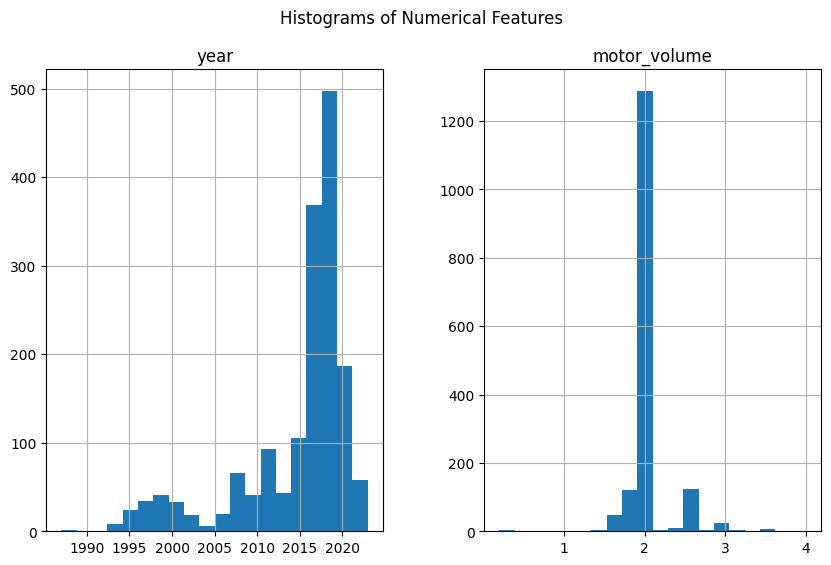

In [ ]:
# Plot histograms for numerical features
numerical_features = ['year', 'motor_volume']
dataset[numerical_features].hist(bins=20, figsize=(10, 6))
plt.suptitle("Histograms of Numerical Features")
plt.show()


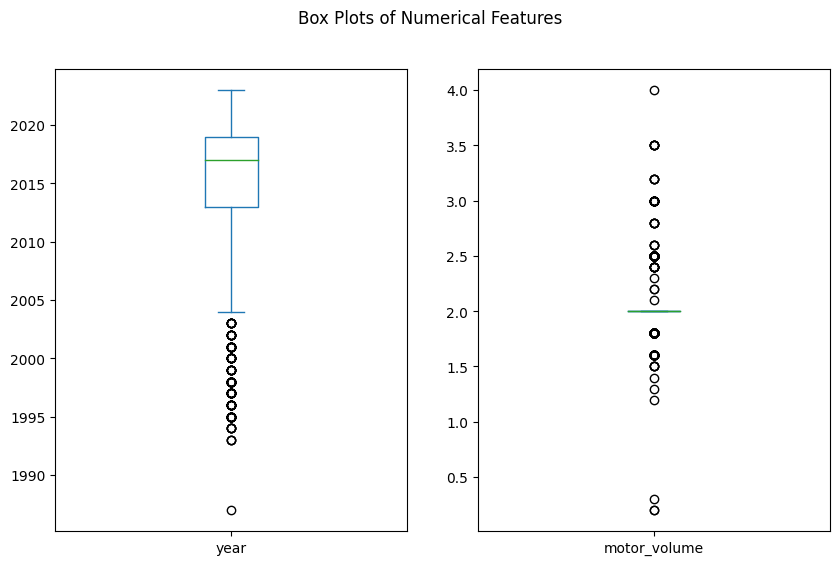

In [ ]:
# Plot box plots for numerical features to check for outliers
dataset[numerical_features].plot(kind='box', subplots=True, layout=(1, len(numerical_features)), figsize=(10, 6))
plt.suptitle("Box Plots of Numerical Features")
plt.show()

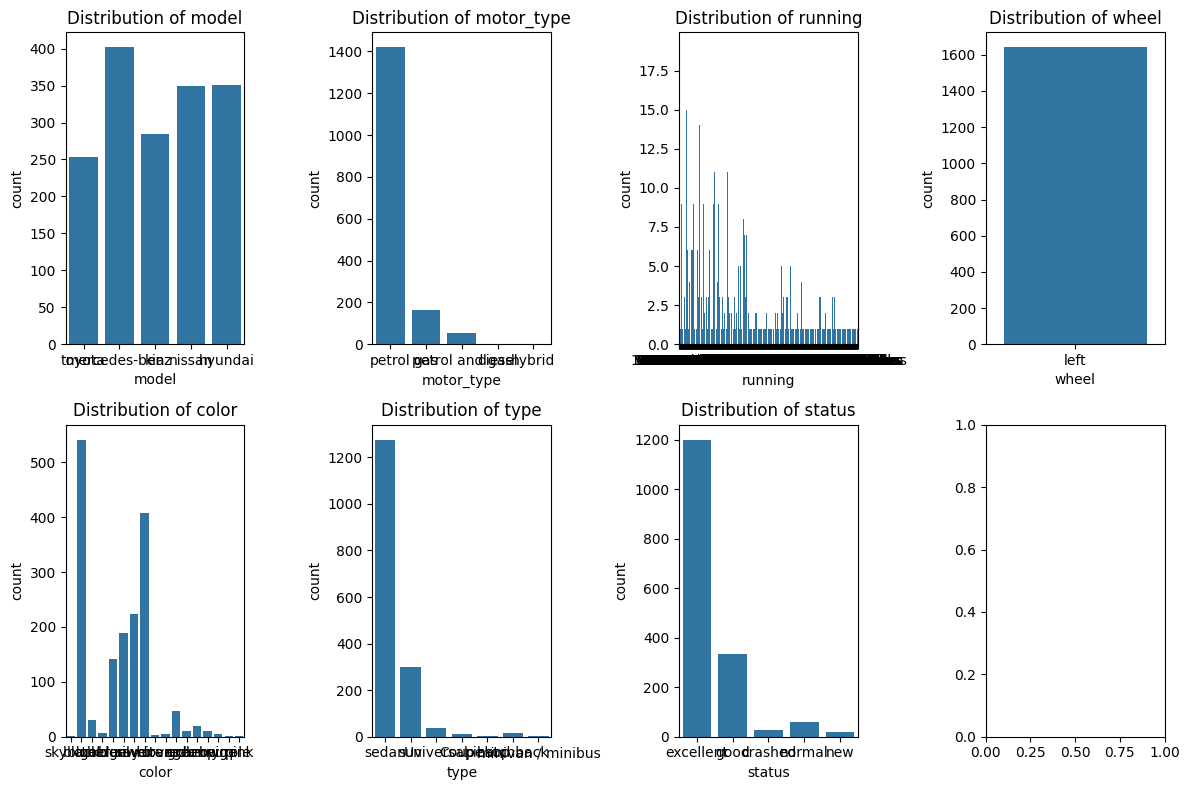

In [ ]:
# Bar plots for categorical features
categorical_features = ['model', 'motor_type', 'running', 'wheel', 'color', 'type', 'status']
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.flatten()

for ax, feature in zip(axes, categorical_features):
    sns.countplot(x=feature, data=dataset, ax=ax)
    ax.set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


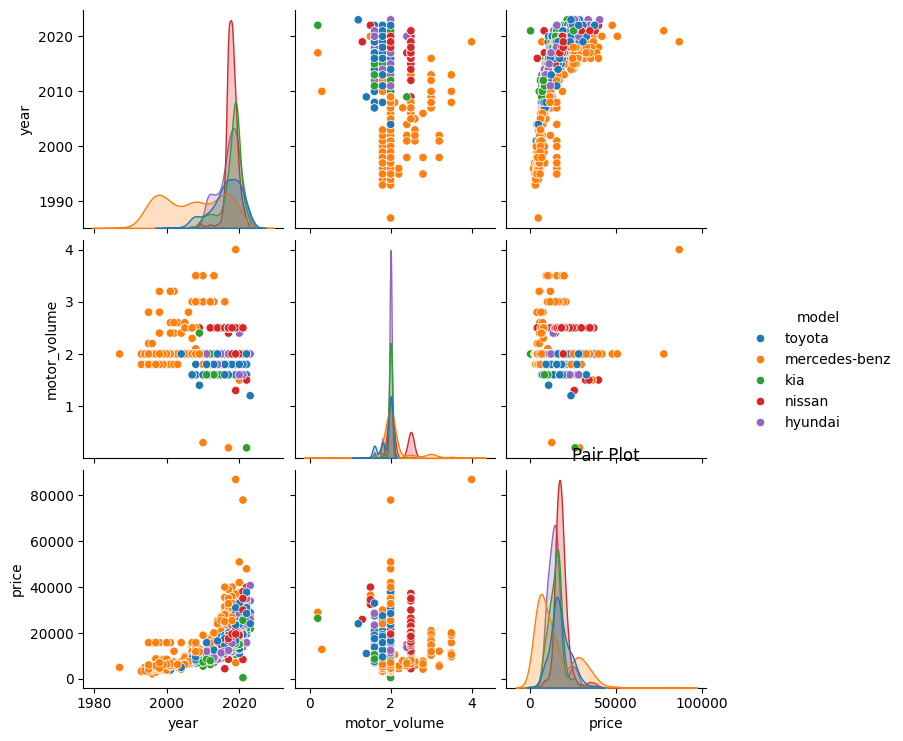

In [ ]:
# Pair plot to visualize relationships between numerical features and target variable
sns.pairplot(dataset, vars=numerical_features + ['price'], hue='model')
plt.title("Pair Plot")
plt.show()

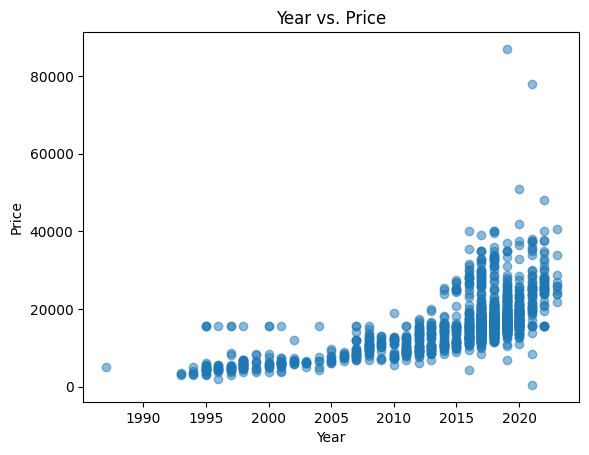

In [ ]:
# Scatter plot to visualize relationships between specific features
plt.scatter(dataset['year'], dataset['price'], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Year vs. Price")
plt.show()

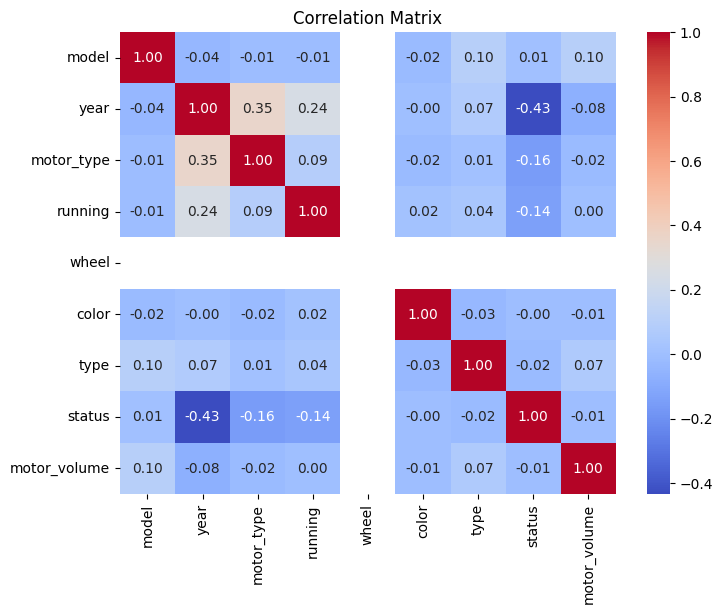

In [ ]:
# Check for multicollinearity using a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


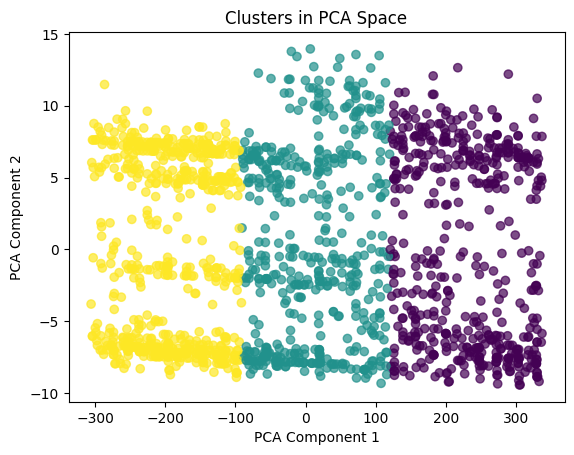

In [ ]:
# Use PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters in PCA Space")
plt.show()

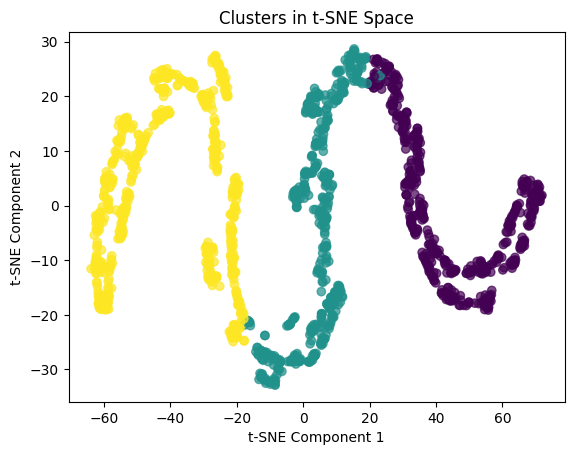

In [ ]:
# Use t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Clusters in t-SNE Space")
plt.show()
